In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.spatial.distance as ssd
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from scipy import stats
pd.options.mode.chained_assignment = None 
import os 
import csv

In [2]:
df = pd.read_csv('variant_surveillance.tsv', sep = '\t',dtype = {'Variant': 'string','Is reference?': 'string',
                                                                 'Is complete?': 'string'})
df.head()

,Accession ID,Type,Clade,Pango lineage,Pangolin version,AA Substitutions,Variant,Collection date,Location,Host,Submission date,Is reference?,Is complete?,Is high coverage?,Is low coverage?,N-Content,GC-Content,Sequence length
0,EPI_ISL_10010236,betacoronavirus,GRA,BA.1.17,PANGO-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,NaN,0.379635,29747
1,EPI_ISL_10010227,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,0.009446,0.379794,29747
2,EPI_ISL_10010232,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,0.000134,0.379585,29747
3,EPI_ISL_3578085,betacoronavirus,GK,B.1.617.2,PLEARN-v1.8,"(N_D377Y,M_I82T,Spike_D950N,N_R203M,NSP12_G671...",VOC Delta GK (B.1.617.2+AY.*) first detected i...,2021-08-18,Europe / Turkey,Human,2021-08-23,<NA>,True,True,NaN,0.000101,0.379853,29754
4,EPI_ISL_10299251,betacoronavirus,GRA,BA.1,PLEARN-v1.8,"(NSP5_P132H,Spike_T95I,Spike_A67V,Spike_K417N,...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-17,Europe / Germany / North Rhine-Westphalia,Human,2022-02-24,<NA>,True,NaN,NaN,0.048908,0.380371,29729


In [3]:
gra = df[df['Clade'] == 'GRA']
gra.head()

,Accession ID,Type,Clade,Pango lineage,Pangolin version,AA Substitutions,Variant,Collection date,Location,Host,Submission date,Is reference?,Is complete?,Is high coverage?,Is low coverage?,N-Content,GC-Content,Sequence length
0,EPI_ISL_10010236,betacoronavirus,GRA,BA.1.17,PANGO-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,NaN,0.379635,29747
1,EPI_ISL_10010227,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,0.009446,0.379794,29747
2,EPI_ISL_10010232,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,0.000134,0.379585,29747
4,EPI_ISL_10299251,betacoronavirus,GRA,BA.1,PLEARN-v1.8,"(NSP5_P132H,Spike_T95I,Spike_A67V,Spike_K417N,...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-17,Europe / Germany / North Rhine-Westphalia,Human,2022-02-24,<NA>,True,NaN,NaN,0.048908,0.380371,29729
5,EPI_ISL_10010220,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,NaN,0.379467,29747


In [4]:
#all pango lineages associated with GRA submissions

gra['Pango lineage'].unique()

array(['BA.1.17', 'BA.1', 'BA.1.1', 'BA.1.15.1', 'BA.2', 'BA.1.17.2',
       'BA.1.15', 'BA.1.12', 'BA.1.14.1', 'BA.1.1.15', 'BA.1.19',
       'BA.1.1.14', 'BA.1.16', 'BA.1.7', 'BA.1.10', 'BA.2.10', 'BA.1.18',
       'BA.2.9', 'BA.1.17.1', 'BA.2.8', 'BA.2.23', 'BA.2.1', 'BA.2.10.1',
       'BA.2.18', 'BA.1.1.1', 'BA.2.3', 'BA.1.1.12', 'BA.1.1.13',
       'BA.1.20', 'BA.1.13', 'BA.1.1.18', 'BA.1.1.4', 'BA.1.5', 'BA.2.32',
       'BA.1.13.1', 'BA.1.1.2', 'BA.1.14', 'XE', 'BA.2.12', 'BA.1.21',
       'BA.1.1.11', 'BA.1.1.10', 'BA.1.1.3', 'BA.2.3.2', 'BA.2.21',
       'BA.2.5', 'BA.2.14', 'Unassigned', 'BA.2.12.1', 'BA.2.6',
       'BA.1.1.9', 'BA.2.16', 'BA.1.15.2', 'BA.1.1.7', 'BA.1.1.16',
       'BA.2.19', 'BA.2.33', 'BA.2.2', 'BA.4', 'BA.5', 'BA.2.15',
       'BA.2.3.4', 'BA.2.31', 'BA.2.26', 'BA.2.7', 'BA.2.28', 'BA.2.11',
       'BA.2.4', 'BA.1.14.2', 'BA.2.22', 'BA.1.8', 'BA.3.1', 'BA.1.9',
       'BA.2.30', 'AY.122', 'BA.2.34', 'BA.2.13', 'BA.2.29', 'BA.2.24',
       'BA.2.17', 'BA

In [5]:
gra['Variant'].unique()

<StringArray>
['VOC Omicron GRA (B.1.1.529+BA.*) first detected in Botswana/Hong Kong/South Africa',
                                                                                 <NA>,
                              'VOC Delta GK (B.1.617.2+AY.*) first detected in India',
                               'VOC Alpha GRY (B.1.1.7+Q.*) first detected in the UK',
                    'VOC Gamma GR/501Y.V3 (P.1+P.1.*) first detected in Brazil/Japan',
                            'VOI Kappa G/452R.V3 (B.1.617.1) first detected in India',
          'VOI Epsilon GH/452R.V1 (B.1.429+B.1.427) first detected in USA/California',
   'VOC Beta GH/501Y.V2 (B.1.351+B.1.351.2+B.1.351.3) first detected in South Africa']
Length: 8, dtype: string

In [6]:
omicron = gra[gra['Variant']=='VOC Omicron GRA (B.1.1.529+BA.*) first detected in Botswana/Hong Kong/South Africa']
omicron.head()

,Accession ID,Type,Clade,Pango lineage,Pangolin version,AA Substitutions,Variant,Collection date,Location,Host,Submission date,Is reference?,Is complete?,Is high coverage?,Is low coverage?,N-Content,GC-Content,Sequence length
0,EPI_ISL_10010236,betacoronavirus,GRA,BA.1.17,PANGO-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,NaN,0.379635,29747
1,EPI_ISL_10010227,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,0.009446,0.379794,29747
2,EPI_ISL_10010232,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,0.000134,0.379585,29747
4,EPI_ISL_10299251,betacoronavirus,GRA,BA.1,PLEARN-v1.8,"(NSP5_P132H,Spike_T95I,Spike_A67V,Spike_K417N,...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-17,Europe / Germany / North Rhine-Westphalia,Human,2022-02-24,<NA>,True,NaN,NaN,0.048908,0.380371,29729
5,EPI_ISL_10010220,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,NaN,0.379467,29747


In [7]:
#print all unique pango lineages in omicron variant
omicron['Pango lineage'].unique()

array(['BA.1.17', 'BA.1', 'BA.1.1', 'BA.1.15.1', 'BA.2', 'BA.1.17.2',
       'BA.1.15', 'BA.1.12', 'BA.1.14.1', 'BA.1.1.15', 'BA.1.19',
       'BA.1.1.14', 'BA.1.16', 'BA.1.7', 'BA.1.10', 'BA.2.10', 'BA.1.18',
       'BA.2.9', 'BA.1.17.1', 'BA.2.8', 'BA.2.23', 'BA.2.1', 'BA.2.10.1',
       'BA.2.18', 'BA.1.1.1', 'BA.2.3', 'BA.1.1.12', 'BA.1.1.13',
       'BA.1.20', 'BA.1.13', 'BA.1.1.18', 'BA.1.1.4', 'BA.1.5', 'BA.2.32',
       'BA.1.13.1', 'BA.1.1.2', 'BA.1.14', 'XE', 'BA.2.12', 'BA.1.21',
       'BA.1.1.11', 'BA.1.1.10', 'BA.1.1.3', 'BA.2.3.2', 'BA.2.21',
       'BA.2.5', 'BA.2.14', 'Unassigned', 'BA.2.12.1', 'BA.2.6',
       'BA.1.1.9', 'BA.2.16', 'BA.1.15.2', 'BA.1.1.7', 'BA.1.1.16',
       'BA.2.19', 'BA.2.33', 'BA.2.2', 'BA.4', 'BA.5', 'BA.2.15',
       'BA.2.3.4', 'BA.2.31', 'BA.2.26', 'BA.2.7', 'BA.2.28', 'BA.2.11',
       'BA.2.4', 'BA.1.14.2', 'BA.2.22', 'BA.1.8', 'BA.3.1', 'BA.1.9',
       'BA.2.30', 'BA.2.34', 'BA.2.13', 'BA.2.29', 'BA.2.24', 'BA.2.17',
       'BA.2.9.1', '

In [22]:
len(omicron['Pango lineage'].unique())   #total 110 unique pango lineages in omicron variant

110

In [23]:
omicron_lineage_counts = pd.DataFrame.from_dict(omicron['Pango lineage'].value_counts().to_dict(), orient='index')
omicron_lineage_counts['pango_lin'] = omicron_lineage_counts.index
omicron_lineage_counts.columns = ['count','pango_lin']
omicron_lineage_counts.head()

,count,pango_lin
BA.2,1140235,BA.2
BA.1.1,987953,BA.1.1
BA.1,507410,BA.1
BA.1.17.2,205749,BA.1.17.2
BA.1.15,183285,BA.1.15


<AxesSubplot: xlabel='pango_lin', ylabel='count'>

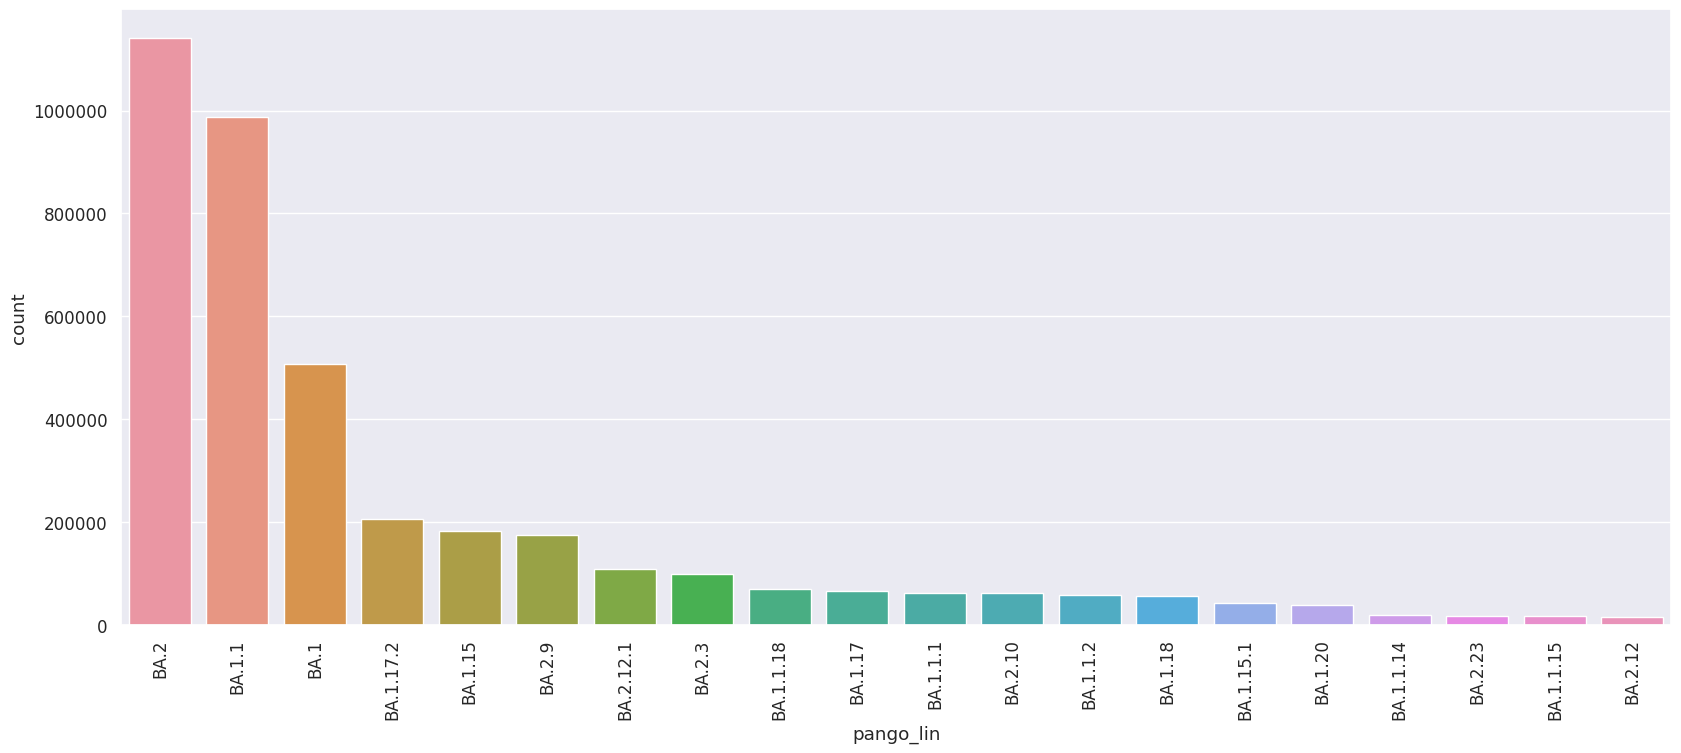

In [24]:
#most common Omicron sub lineages
sns.set_style("darkgrid")
sns.set(font_scale = 1.1,rc = {'figure.figsize':(20,8)})
ax = sns.barplot(x = omicron_lineage_counts['pango_lin'].iloc[:20], y = omicron_lineage_counts['count'].iloc[:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.ticklabel_format(style='plain', axis='y')
ax

In [25]:
len(omicron['Pango lineage'].unique())

110

In [26]:
# #specify strings for countries 

# europe_list = ['Turkey', 'Germany', 'United Kingdom','Brazil','Israel', 'Denmark','Spain','Italy','Ireland','Cuba','Canada','Belgium','Sweden',
#               'South Korea','USA','France','Japan','Austria','Netherlands','Switzerland','Ireland','Poland','Mexico','Luxembourg']
%time
europe_list = ["Europe", "North America","Oceania", "Asia","South America", "Africa"]

for i in europe_list:
    
    omicron.loc[omicron['Location'].str.contains(i), 'Location'] = i
    

CPU times: user 8 µs, sys: 1e+03 ns, total: 9 µs
Wall time: 20.7 µs


In [27]:
omicron['Location'].unique().tolist()[:25]

['Oceania', 'Europe', 'North America', 'Asia', 'Africa', 'South America']

In [28]:
tmp = omicron['Pango lineage'].str.split('.', expand=True)
tmp.head()

,0,1,2,3
0,BA,1,17,None
1,BA,1,17,None
2,BA,1,17,None
4,BA,1,None,None
5,BA,1,17,None


In [29]:
tmp['short_pango'] = tmp[0].astype(str) + '.'+ tmp[1].astype(str)
tmp['short_pango']

0           BA.1
1           BA.1
2           BA.1
4           BA.1
5           BA.1
            ... 
11389715    BA.1
11389716    BA.1
11389717    BA.1
11389718    BA.1
11389719    BA.1
Name: short_pango, Length: 4155927, dtype: object

In [30]:
tmp['short_pango'].unique()

array(['BA.1', 'BA.2', 'XE.None', 'Unassigned.None', 'BA.4', 'BA.5',
       'BA.3', 'XM.None', 'XJ.None', 'XH.None', 'XP.None', 'XN.None',
       'XF.None', 'XU.None', 'XK.None', 'AY.39', 'AY.125'], dtype=object)

In [31]:
omicron['short_pango'] = tmp['short_pango']
omicron.head()

,Accession ID,Type,Clade,Pango lineage,Pangolin version,AA Substitutions,Variant,Collection date,Location,Host,Submission date,Is reference?,Is complete?,Is high coverage?,Is low coverage?,N-Content,GC-Content,Sequence length,short_pango
0,EPI_ISL_10010236,betacoronavirus,GRA,BA.1.17,PANGO-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania,Human,2022-02-17,<NA>,True,NaN,NaN,NaN,0.379635,29747,BA.1
1,EPI_ISL_10010227,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania,Human,2022-02-17,<NA>,True,NaN,NaN,0.009446,0.379794,29747,BA.1
2,EPI_ISL_10010232,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania,Human,2022-02-17,<NA>,True,NaN,NaN,0.000134,0.379585,29747,BA.1
4,EPI_ISL_10299251,betacoronavirus,GRA,BA.1,PLEARN-v1.8,"(NSP5_P132H,Spike_T95I,Spike_A67V,Spike_K417N,...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-17,Europe,Human,2022-02-24,<NA>,True,NaN,NaN,0.048908,0.380371,29729,BA.1
5,EPI_ISL_10010220,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania,Human,2022-02-17,<NA>,True,NaN,NaN,NaN,0.379467,29747,BA.1


In [32]:
tmp.head()
del tmp

In [33]:
#only include BA.1 - BA.5
pango_list = ['BA.1','BA.2', 'BA.3', 'BA.4', 'BA.5']
omicron2 = omicron[(omicron['Location'] == 'North America') & (omicron['short_pango'].isin(pango_list))].reset_index()  #uk, USA works
omicron2.head()

,index,Accession ID,Type,Clade,Pango lineage,Pangolin version,AA Substitutions,Variant,Collection date,Location,Host,Submission date,Is reference?,Is complete?,Is high coverage?,Is low coverage?,N-Content,GC-Content,Sequence length,short_pango
0,28,EPI_ISL_8213757,betacoronavirus,GRA,BA.1.15,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2021-12-21,North America,Human,2021-12-31,<NA>,True,NaN,NaN,0.019043,0.379405,29827,BA.1
1,100,EPI_ISL_8213747,betacoronavirus,GRA,BA.1.17.2,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2021-12-19,North America,Human,2021-12-31,<NA>,True,NaN,NaN,0.026430,0.379314,29852,BA.1
2,152,EPI_ISL_8511787,betacoronavirus,GRA,BA.1.1,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-02,North America,Human,2022-01-09,<NA>,True,NaN,NaN,0.017755,0.379762,29851,BA.1
3,178,EPI_ISL_8511788,betacoronavirus,GRA,BA.1,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-02,North America,Human,2022-01-09,<NA>,True,NaN,NaN,0.030744,0.379661,29827,BA.1
4,232,EPI_ISL_8511820,betacoronavirus,GRA,BA.1,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-01,North America,Human,2022-01-09,<NA>,True,NaN,NaN,0.021792,0.379374,29827,BA.1


In [34]:
#get weekly dates
omicron2 = omicron2[['short_pango','Collection date']]
omicron2['Collection date'] = pd.to_datetime(omicron2['Collection date'])
omicron2['Week'] = omicron2['Collection date'].dt.to_period('W')
omicron2.head()

,short_pango,Collection date,Week
0,BA.1,2021-12-21,2021-12-20/2021-12-26
1,BA.1,2021-12-19,2021-12-13/2021-12-19
2,BA.1,2022-01-02,2021-12-27/2022-01-02
3,BA.1,2022-01-02,2021-12-27/2022-01-02
4,BA.1,2022-01-01,2021-12-27/2022-01-02


In [35]:
#calculate frequency at each week for each lineage
omicron3 = omicron2.groupby(['short_pango','Week']).size().reset_index()
omicron3.columns = ['pango_lin','week','freq']
omicron3.head()

,pango_lin,week,freq
0,BA.1,2021-11-01/2021-11-07,6
1,BA.1,2021-11-08/2021-11-14,10
2,BA.1,2021-11-15/2021-11-21,10
3,BA.1,2021-11-22/2021-11-28,102
4,BA.1,2021-11-29/2021-12-05,1977


In [36]:
# # Export the DataFrame to a CSV file
# omicron3.to_csv('omicron_sublineages_cleaned_USA.csv', index=False)

In [37]:
#pivot so lineages are columns and date is index
omicron3 = omicron3.pivot(index = 'week', columns = 'pango_lin', values = 'freq').reset_index()
omicron3['week'] = omicron3['week'].astype(str)
omicron3.head()

pango_lin,week,BA.1,BA.2,BA.3,BA.4,BA.5
0,2021-11-01/2021-11-07,6.0,NaN,NaN,NaN,NaN
1,2021-11-08/2021-11-14,10.0,NaN,NaN,NaN,NaN
2,2021-11-15/2021-11-21,10.0,NaN,NaN,NaN,NaN
3,2021-11-22/2021-11-28,102.0,NaN,NaN,NaN,NaN
4,2021-11-29/2021-12-05,1977.0,8.0,1.0,NaN,NaN


In [38]:
#get month and year from week column
omicron3['date'] = np.random.randint(1,6,omicron3.shape[0])
# print(omicron3)
dt=omicron3['week'].str.rsplit('-',n=3, expand = True)
# print(dt[0])
omicron3['date'] = dt[0]
omicron3 = omicron3[['week','date','BA.1','BA.2', 'BA.3', 'BA.4', 'BA.5']]
omicron3.head()

pango_lin,week,date,BA.1,BA.2,BA.3,BA.4,BA.5
0,2021-11-01/2021-11-07,2021-11,6.0,NaN,NaN,NaN,NaN
1,2021-11-08/2021-11-14,2021-11,10.0,NaN,NaN,NaN,NaN
2,2021-11-15/2021-11-21,2021-11,10.0,NaN,NaN,NaN,NaN
3,2021-11-22/2021-11-28,2021-11,102.0,NaN,NaN,NaN,NaN
4,2021-11-29/2021-12-05,2021-11,1977.0,8.0,1.0,NaN,NaN


In [39]:
gra.head()

,Accession ID,Type,Clade,Pango lineage,Pangolin version,AA Substitutions,Variant,Collection date,Location,Host,Submission date,Is reference?,Is complete?,Is high coverage?,Is low coverage?,N-Content,GC-Content,Sequence length
0,EPI_ISL_10010236,betacoronavirus,GRA,BA.1.17,PANGO-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,NaN,0.379635,29747
1,EPI_ISL_10010227,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,0.009446,0.379794,29747
2,EPI_ISL_10010232,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,0.000134,0.379585,29747
4,EPI_ISL_10299251,betacoronavirus,GRA,BA.1,PLEARN-v1.8,"(NSP5_P132H,Spike_T95I,Spike_A67V,Spike_K417N,...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-17,Europe / Germany / North Rhine-Westphalia,Human,2022-02-24,<NA>,True,NaN,NaN,0.048908,0.380371,29729
5,EPI_ISL_10010220,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,NaN,0.379467,29747


In [40]:
pango_list = ['BA.1','BA.2', 'BA.3', 'BA.4', 'BA.5']

#function to generate distance matrix based on quarter, year, and continent
def create_distance_matrix(df,quarter_continent):
    distance_matrix = pd.DataFrame(index = pango_list)
    distance_matrix[['BA.1','BA.2', 'BA.3', 'BA.4', 'BA.5']] = np.nan
    #fill in distance matrix
    for i in pango_list:
        for j in pango_list:
            if i == j:
                distance_matrix.loc[i,j] = 0
            else:
                distance_matrix.loc[i,j] = (abs((df.loc[df['pango_lin'] == '{a} vs {b}'.format(a=i,b=j),
                                                        quarter_continent].iloc[0] + 
                                            df.loc[df['pango_lin'] == '{a} vs {b}'.format(a=i,b=j), 
                                                   quarter_continent].iloc[0])/2))
                distance_matrix.loc[j,i] = (abs((df.loc[df['pango_lin'] == '{a} vs {b}'.format(a=i,b=j), 
                                                        quarter_continent].iloc[0] + 
                                            df.loc[df['pango_lin'] == '{a} vs {b}'.format(a=i,b=j), 
                                                   quarter_continent].iloc[0])/2))
    return distance_matrix

#function to generate difference matrix based on quarter, year, and continent
def create_difference_matrix(df,quarter_continent):
    difference_matrix = pd.DataFrame(index = pango_list)
    difference_matrix[['BA.1','BA.2', 'BA.3', 'BA.4', 'BA.5']] = np.nan
    #fill in difference matrix
    for i in pango_list:
        for j in pango_list:
            if i == j:
                difference_matrix.loc[i,j] = 0
            else:
                difference_matrix.loc[i,j] = (abs((df.loc[df['pango_lin'] == '{a} vs {b}'.format(a=i,b=j),
                                                        quarter_continent].iloc[0] + 
                                            df.loc[df['pango_lin'] == '{a} vs {b}'.format(a=i,b=j), 
                                                   quarter_continent].iloc[0])/2))
                difference_matrix.loc[j,i] = (abs((df.loc[df['pango_lin'] == '{a} vs {b}'.format(a=i,b=j), 
                                                        quarter_continent].iloc[0] + 
                                            df.loc[df['pango_lin'] == '{a} vs {b}'.format(a=i,b=j), 
                                                   quarter_continent].iloc[0])/2))
    #if row_vs_col is a negative value, make it negative in difference matrix
    for i,v in difference_matrix.iterrows():
        for j in difference_matrix:
            if i != j:
                if (df.loc[df['pango_lin'] == '{a} vs {b}'.format(a=i,b=j),quarter_continent].iloc[0]) < 0:
                    difference_matrix.loc[i,j] *= -1
    return difference_matrix

#function to calculate the log transformed ratio of two clades
def transform_ratio(pango_1, pango_2):
    return np.log10(pango_1/pango_2)


def time_frame(df, start_date, end_date):  #updated
    time_window = pd.date_range(start=start_date, end=end_date).strftime('%Y-%m').unique().tolist()
#     print(time_window)
    dataframe = df.loc[df['date'].isin(time_window)]
#     print(dataframe)
    dataframe.iloc[:,2:] = dataframe.iloc[:,2:].cumsum()
#     print(dataframe)
    return dataframe

# def time_frame(df, start_date, end_date):  #updated
#     time_window = pd.date_range(start=start_date, end=end_date).strftime('%Y-%m').unique().tolist()
#     print(time_window)
#     dataframe = df.loc[df['Collection date'].isin(time_window)]
#     dataframe.iloc[:,2:] = dataframe.iloc[:,2:].cumsum()
#     for i in dataframe.columns.tolist():
#         if dataframe[i].isnull().all():
#             dataframe = dataframe.drop(i, axis=1)
#     return dataframe

def time_frame_no_cumsum(df,start_date, end_date): #updated
    time_window = pd.date_range(start=start_date, end=end_date).strftime('%Y-%m').unique().tolist()
#     print(time_window)
    dataframe = df.loc[df['date'].isin(time_window)]
    return dataframe

# def time_frame_no_cumsum(df,start_date, end_date): #updated
#     time_window = pd.date_range(start=start_date, end=end_date).strftime('%Y-%m').unique().tolist()
#     print(time_window)
#     dataframe = df.loc[df['Collection date'].isin(time_window)]
#     return dataframe

#function returns slope of pango advantage plots
def slope(day, pango):
    par = np.polyfit(day, pango, 1, full = True)
    slope= par[0][0]
    return slope

def pango_comparisons(dataframe):
    dataframe['date_ordinal'] = pd.to_datetime(dataframe['week']).apply(lambda date: date.toordinal())
    dataframe['days'] = dataframe['date_ordinal'] - 737425
    #calculate log ratio for each clade comparison
    for i in pango_list:
        for j in pango_list:
            if i != j:
                dataframe['{a} vs {b}'.format(a=i,b=j)] = dataframe.apply(lambda row : 
                                                                        transform_ratio(row['{a}'.format(a=i)],
                                                                                        row['{b}'.format(b=j)]),
                                                                                        axis = 1)
    dataframe = dataframe.drop(['BA.1','BA.2', 'BA.3', 'BA.4', 'BA.5','date_ordinal'], axis=1)
    return dataframe

In [41]:
'''
the `automation_who` function does the pairwise comparison heatmap for Omicron sublineages at a target 
location within a time window, which has a start date in the format ex: 2021-12 and end date

'''
def automation_who(country, dataset, start, end):
    
    variant = dataset[dataset['Variant']=='VOC Omicron GRA (B.1.1.529+BA.*) first detected in Botswana/Hong Kong/South Africa']
    
    variant_lineage_counts = pd.DataFrame.from_dict(variant['Pango lineage'].value_counts().to_dict(), orient='index')
    variant_lineage_counts['pango_lin'] = variant_lineage_counts.index
    variant_lineage_counts.columns = ['count','pango_lin']
    
    #specify strings for countries 

#     europe_list = ['Turkey', 'Germany', 'United Kingdom','Brazil','Israel', 'Denmark','Spain','Italy','Ireland','Cuba','Canada','Belgium','Sweden',
#               'South Korea','USA','France','Japan','Austria','Netherlands','Switzerland','Ireland','Poland','Mexico','Luxembourg']
    europe_list = [country]

    for i in europe_list:
    
        variant.loc[variant['Location'].str.contains(i), 'Location'] = i
        
    tmp_ = variant['Pango lineage'].str.split('.', expand=True)
    tmp_['short_pango'] = tmp_[0].astype(str) + '.'+ tmp_[1].astype(str)
    variant['short_pango'] = tmp_['short_pango']
    del tmp_
    
    #only include BA.1 - BA.5
    pango_list = ['BA.1','BA.2', 'BA.3', 'BA.4', 'BA.5']
    variant2 = variant[(variant['Location'] == country) & (variant['short_pango'].isin(pango_list))].reset_index()  #uk, USA works
    
    #get weekly dates
    variant2 = variant2[['short_pango','Collection date']]
    variant2['Collection date'] = pd.to_datetime(variant2['Collection date'])
    variant2['Week'] = variant2['Collection date'].dt.to_period('W')
    
    #calculate frequency at each week for each lineage
    variant3 = variant2.groupby(['short_pango','Week']).size().reset_index()
    variant3.columns = ['pango_lin','week','freq']
    print(variant3.head())
    #pivot so lineages are columns and date is index
    variant3 = variant3.pivot(index = 'week', columns = 'pango_lin', values = 'freq').reset_index()
    variant3['week'] = variant3['week'].astype(str)

    #get month and year from week column
    variant3['date'] = np.random.randint(1,6,variant3.shape[0])
    # print(omicron3)
    dt=variant3['week'].str.rsplit('-',n=3, expand = True)
    # print(dt[0])
    variant3['date'] = dt[0]
    variant3 = variant3[['week','date','BA.1','BA.2', 'BA.3', 'BA.4', 'BA.5']] #
    
    #specify time frame for analysis
#     variant_sum = time_frame(variant3,['2022-04','2022-05'])
    variant_sum = time_frame(variant3, start, end)
    
    #calculate log comparisons
    variant_fitness = pango_comparisons(variant_sum)
    variant_fitness['days'] -= variant_fitness['days'].iloc[0]
    # print('Test')
    # print(variant_fitness)
    
    
    #calculate slopes, must disregard nans
    variant_slopes = pd.DataFrame()
    cols = variant_fitness.columns.to_list()
#     print(cols)
    variant_slopes['pango_lin'] = cols[3:]
    slopes = []
    for i,v in enumerate(variant_fitness.iloc[:,3:]):
        tmp_ = variant_fitness[~variant_fitness.iloc[:,i+3].isnull()]
        tmp_['pseudo_time'] = np.array(range(0, tmp_.shape[0] ))*7
#         print("Returns the clade comparison between differnet lineages at every week")
        # print(tmp_)
        slopes.append(slope(tmp_.iloc[0:len(tmp_),23], tmp_.iloc[0:len(tmp_),i+3]))
    variant_slopes['Slope'] = slopes
#     variant_slopes = pd.DataFrame(variant_slopes)
#     print("returns the value of slope between different pango lineages")
#     print(f"variant slopes:\n {variant_slopes}")
#     variant_slopes.to_csv(r'AS_slope.csv')
    # variant_slopes.to_csv(country+"_slope"+r'.csv')
    #print(variant_slopes.shape)
    
    #define the file path
    file_path = f'/scr/mjpantho/Pantho_differential_fitness/Distance Matrix for Continents pango/{country + "_" + start + "_" + end + "_dist_mat_pango_omicron"}.csv'

    dist_mat = create_distance_matrix(variant_slopes,'Slope')
#     dist_mat.to_csv(file_path, index=True)
    print(f"Diatance matrix: \n {dist_mat}")
    
    dif_mat = create_difference_matrix(variant_slopes,'Slope')
    # dif_mat.to_csv(country+"_dif_mat_pango"+r'.csv')
    
    #Plot distance matrix as clustermap
    sns.set(rc = {'figure.figsize':(2,2)}, font_scale = 1.2)

    #create distance array from distance matrix
    distance_array = ssd.squareform(dist_mat) 

    #create linkage object
    distance_linkage = hierarchy.linkage(distance_array)

    #display clustermap
    g = sns.clustermap(dif_mat, row_linkage=distance_linkage, col_linkage=distance_linkage,
                        cmap = 'coolwarm',vmin=-.023,vmax=0.023, cbar_pos=(0.971, 0.079, .05, 0.74 * (4 / 4)),figsize=(4, 4))
    # plt.savefig(country+"_clustermap"+'.png')
#     return g
    g.fig.suptitle(f'Clustermaps of Omicron Sub-lineages\nTime Window: ({start}) - ({end})\nLocation: {country}', fontsize=7.5, y=1.05)

    # Specify the directory path
    directory = "/scr/mjpantho/Pantho_differential_fitness/omicron_sublineages_heatmaps_continents/"

    # Create the directory if it doesn't exist
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Save the figure to the specified directory with DPI set to 300
    print(f"File saving to {directory}")
    filename = os.path.join(directory, country + "_omicron_sublineages_heatmaps_continents.png")
    g.savefig(filename, dpi=300, bbox_inches="tight")

    # Return the clustermap
    return g

#     #scatterplot 

#     sns.set_style("darkgrid")
#     sns.set(rc = {'figure.figsize':(15,8)})
#     legend = []
#     marker = ['.', '+', 'v', 'x','*']
#     c=0
#     for i in pango_list:
#         if i != 'BA.5':   #if any VOCS missing change should take place here
#             mask = ~np.isnan(variant_fitness['days']) & ~np.isnan(variant_fitness['BA.5vs{a}'.format(a=i)])
#             slope, intercept, r_value, p_value, std_err = stats.linregress(variant_fitness['days'][mask],variant_fitness['BA.5vs{a}'.format(a=i)][mask])
# #             print(df_['GRAvs{a}'.format(a=i)])
#             sns.regplot(x = variant_fitness['days'], y = variant_fitness['BA.5vs{a}'.format(a=i)], marker = marker[c],scatter_kws={'s':50})
#             legend.append('BA.5 vs {0}: y={1:.1e}x+{2:.1f}'.format(i, slope, intercept))
#         c+=1
#     plt.legend(legend, loc='upper left')
#     plt.ylabel(r'log$_1$$_0$(pango$_1$/pango$_2$)')
#     plt.title('BA.5 vs other sublineages of Omicron'+" for "+country)
# #    plt.savefig(country+"_slope"+'.png')

### Heatmaps

  pango_lin                   week  freq
0      BA.1  2021-11-01/2021-11-07     6
1      BA.1  2021-11-08/2021-11-14    10
2      BA.1  2021-11-15/2021-11-21    10
3      BA.1  2021-11-22/2021-11-28   102
4      BA.1  2021-11-29/2021-12-05  1977
Diatance matrix: 
           BA.1      BA.2      BA.3      BA.4      BA.5
BA.1  0.000000  0.011108  0.005338  0.041277  0.053027
BA.2  0.011108  0.000000  0.008642  0.030170  0.042768
BA.3  0.005338  0.008642  0.000000  0.042275  0.052902
BA.4  0.041277  0.030170  0.042275  0.000000  0.013199
BA.5  0.053027  0.042768  0.052902  0.013199  0.000000
File saving to /scr/mjpantho/Pantho_differential_fitness/omicron_sublineages_heatmaps_continents/


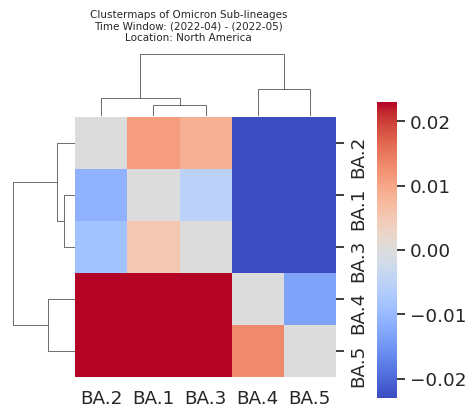

In [42]:
#automation function finds the diatance matrix
automation_who('North America', gra, start = '2022-04', end = '2022-05')

  pango_lin                   week  freq
0      BA.1  2021-11-01/2021-11-07    16
1      BA.1  2021-11-08/2021-11-14     6
2      BA.1  2021-11-15/2021-11-21    17
3      BA.1  2021-11-22/2021-11-28   415
4      BA.1  2021-11-29/2021-12-05  4880
Diatance matrix: 
           BA.1      BA.2      BA.3      BA.4      BA.5
BA.1  0.000000  0.007033  0.001978  0.042415  0.045530
BA.2  0.007033  0.000000  0.006208  0.037892  0.042186
BA.3  0.001978  0.006208  0.000000  0.044372  0.047117
BA.4  0.042415  0.037892  0.044372  0.000000  0.003869
BA.5  0.045530  0.042186  0.047117  0.003869  0.000000
File saving to /scr/mjpantho/Pantho_differential_fitness/omicron_sublineages_heatmaps_continents/


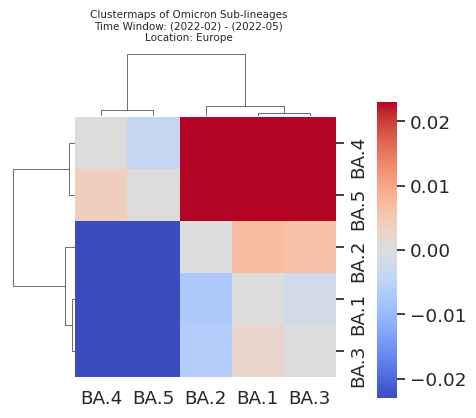

In [43]:
# automation function finds the diatance matrix
automation_who('Europe', gra, start = '2022-02', end = '2022-05')

  pango_lin                   week  freq
0      BA.1  2021-11-01/2021-11-07    22
1      BA.1  2021-11-08/2021-11-14     7
2      BA.1  2021-11-15/2021-11-21    17
3      BA.1  2021-11-22/2021-11-28    49
4      BA.1  2021-11-29/2021-12-05  1191
Diatance matrix: 
           BA.1      BA.2      BA.3      BA.4      BA.5
BA.1  0.000000  0.008037  0.010607  0.051403  0.057299
BA.2  0.008037  0.000000  0.002364  0.038832  0.046805
BA.3  0.010607  0.002364  0.000000  0.100756  0.089063
BA.4  0.051403  0.038832  0.100756  0.000000  0.005945
BA.5  0.057299  0.046805  0.089063  0.005945  0.000000
File saving to /scr/mjpantho/Pantho_differential_fitness/omicron_sublineages_heatmaps_continents/


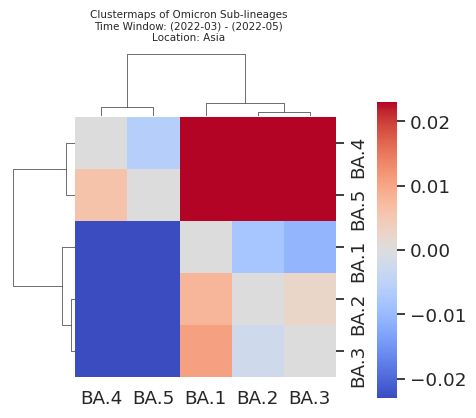

In [44]:
# automation function finds the diatance matrix
automation_who('Asia', gra, start = '2022-03', end = '2022-05')

  pango_lin                   week  freq
0      BA.1  2021-11-01/2021-11-07    24
1      BA.1  2021-11-08/2021-11-14    34
2      BA.1  2021-11-15/2021-11-21   281
3      BA.1  2021-11-22/2021-11-28   892
4      BA.1  2021-11-29/2021-12-05  1966
Diatance matrix: 
           BA.1      BA.2      BA.3      BA.4      BA.5
BA.1  0.000000  0.006825  0.006555  0.041065  0.033623
BA.2  0.006825  0.000000  0.009331  0.034524  0.027082
BA.3  0.006555  0.009331  0.000000  0.107331  0.083263
BA.4  0.041065  0.034524  0.107331  0.000000  0.007442
BA.5  0.033623  0.027082  0.083263  0.007442  0.000000
File saving to /scr/mjpantho/Pantho_differential_fitness/omicron_sublineages_heatmaps_continents/


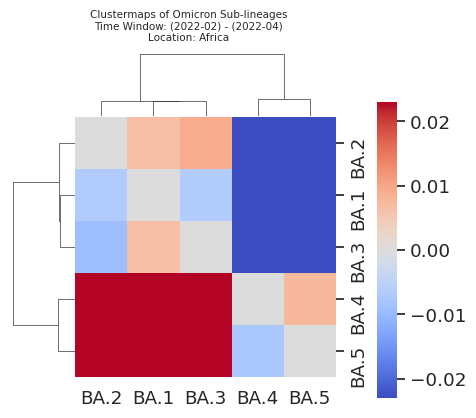

In [45]:
# automation function finds the diatance matrix
automation_who('Africa', gra, start = '2022-02', end = '2022-04')

In [46]:
# automation function finds the diatance matrix
# automation_who('Oceania', gra, start = '2022-03', end = '2022-05')

In [47]:
# automation function finds the diatance matrix
# automation_who('Europe', gra, start = '2022-02', end = '2022-05')

In [48]:
#automation function finds the diatance matrix
# automation_who('United Kingdom', gra, start = '2022-01', end = '2022-05')

In [49]:
#automation function finds the diatance matrix
# automation_who('Europe', gra, start = '2022-02', end = '2022-05')

# Scatterplots
*the `scatterplot_who1` function generates the `regression plots` for Omicron sublineages at a target 
location within a time window, which has a start date and end date in the format ex: 2021-12 *

In [50]:
# def scatterplot_who1(country, dataset, start, end, lineages):
    
#     variant = dataset[dataset['Variant']=='VOC Omicron GRA (B.1.1.529+BA.*) first detected in Botswana/Hong Kong/South Africa']
    
#     variant_lineage_counts = pd.DataFrame.from_dict(variant['Pango lineage'].value_counts().to_dict(), orient='index')
#     variant_lineage_counts['pango_lin'] = variant_lineage_counts.index
#     variant_lineage_counts.columns = ['count','pango_lin']
    
#     #specify strings for countries 

# #     europe_list = ['Turkey', 'Germany', 'United Kingdom','Brazil','Israel', 'Denmark','Spain','Italy','Ireland','Cuba','Canada','Belgium','Sweden',
# #               'South Korea','USA','France','Japan','Austria','Netherlands','Switzerland','Ireland','Poland','Mexico','Luxembourg']
#     europe_list = [country]

#     for i in europe_list:
    
#         variant.loc[variant['Location'].str.contains(i), 'Location'] = i
        
#     tmp_ = variant['Pango lineage'].str.split('.', expand=True)
#     tmp_['short_pango'] = tmp_[0].astype(str) + '.'+ tmp_[1].astype(str)
#     variant['short_pango'] = tmp_['short_pango']
#     del tmp_
    
#     #only include BA.1 - BA.5
#     pango_list = ['BA.1','BA.2', 'BA.3', 'BA.4', 'BA.5']
#     variant2 = variant[(variant['Location'] == country) & (variant['short_pango'].isin(pango_list))].reset_index()  #uk, USA works
    
#     #get weekly dates
#     variant2 = variant2[['short_pango','Collection date']]
#     variant2['Collection date'] = pd.to_datetime(variant2['Collection date'])
#     variant2['Week'] = variant2['Collection date'].dt.to_period('W')
    
#     #calculate frequency at each week for each lineage
#     variant3 = variant2.groupby(['short_pango','Week']).size().reset_index()
#     variant3.columns = ['pango_lin','week','freq']
    
#     #pivot so lineages are columns and date is index
#     variant3 = variant3.pivot(index = 'week', columns = 'pango_lin', values = 'freq').reset_index()
#     variant3['week'] = variant3['week'].astype(str)

#     #get month and year from week column
#     variant3['date'] = np.random.randint(1,6,variant3.shape[0])
#     # print(omicron3)
#     dt=variant3['week'].str.rsplit('-',n=3, expand = True)
#     # print(dt[0])
#     variant3['date'] = dt[0]
#     variant3 = variant3[['week','date','BA.1','BA.2', 'BA.3', 'BA.4', 'BA.5']]
    
#     #specify time frame for analysis
#     variant_sum = time_frame(variant3,start, end)
    
#     #calculate log comparisons
#     variant_fitness = pango_comparisons(variant_sum)
#     variant_fitness['days'] -= variant_fitness['days'].iloc[0]
# #     print('Test')
# #     print(variant_fitness)
    

#     #scatterplot of omicron BA.1 lineage fitness
#     sns.set_style("white")
#     sns.set(rc = {'figure.figsize':(5,3)})
#     plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.9)
# #     pango_compare = [lineage]
#     marker = ['.', '+', 'v', 'x','*']
#     legend=[]
#     c=0
#     # Create a list to store the slope values and corresponding locations
#     slope_values = []

#     for i in lineages: 
#         mask = ~np.isnan(variant_fitness['days']) & ~np.isnan(variant_fitness['BA.5 vs {0}'.format(i)])
#         slope, intercept, r_value, p_value, std_err = stats.linregress(variant_fitness['days'][mask],variant_fitness['BA.5 vs {0}'.format(i)][mask])
# #         print('test')
# #         print(slope)
# #         print(intercept)
#         # r_squared = r_value ** 2
#         # r_squared_values.append(r_squared)
#         # print(f"r-squared value: {r_squared}")
#         slope_values.append((country, 'BA.5 vs {0}'.format(i), slope, start+"-"+end))  # Append tuple of location and slope value
#         sns.regplot(x=variant_fitness['days'], y=variant_fitness['BA.5 vs {0}'.format(i)], marker=marker[c],scatter_kws={'s':50},label='BA.5 vs {0}: y={1:.1e}x+{2:.1f}'.format(i, slope, intercept))
#         # legend.append('BA.5 vs {0}: y={1:.1e}x+{2:.1f}'.format(i, slope, intercept))
#         c+=1
#     print(slope_values)
    
#     '''
#     #Save the slope values of corresponding countries to a CSV file
#     # Define the file path to save the CSV
#     csv_file = 'Omicron_sublineages_slope_values_continent.csv'

#     # Append the slope values to the CSV file
#     with open(csv_file, 'a', newline='') as file:
#         writer = csv.writer(file)
#         if file.tell() == 0:
#             writer.writerow(['Location', 'Sublineages_compared', 'Slope', 'Time_window'])  # Write the header row if the file is empty
#         writer.writerows(slope_values)  # Append the slope values

#     print('Slope values saved to', csv_file)
#     '''
        
#     plt.legend(loc='lower right', prop={'size': 6}, facecolor='white', frameon=False, fontsize=8)
#     plt.xlabel('Days', fontsize = 7.5)
#     plt.ylabel(r'$\log_{10}\left(\frac{\mathrm{Variant\ 1}}{\mathrm{Variant\ 2}}\right)$', fontsize=7.5, labelpad=1)
#     plt.title(f'BA.5 vs BA.* \n Time Window: ({start}) - ({end}) \n Location : {country}', fontsize = 7.5)
#     plt.rc('axes', labelsize= 7.5)  # Adjust the label font size
#     plt.rc('xtick', labelsize=7.5)
#     plt.rc('ytick', labelsize= 7.5)
#     plt.gca().set_facecolor('white')  # Set plot background color to white

#     # Add vertical bars for x-axis and y-axis without changing the range
#     plt.axhline(y=plt.ylim()[0], color=(0, 0, 0.1))  # Vertical bar for y-axis
#     plt.axvline(x=plt.xlim()[0], color=(0, 0, 0.1))  # Vertical bar for x-axis
    
#     #Save the figures to `omicron_sublineages_regression_plots` folder
#     import os

#     # Specify the directory path
#     directory = "/scr/mjpantho/Pantho_differential_fitness/omicron_sublineages_regression_plots/"

#     # Create the directory if it doesn't exist
#     if not os.path.exists(directory):
#         os.makedirs(directory)

#     # Save the figure to the specified directory with DPI set to 300
#     filename = os.path.join(directory, country + "_regression_Omicron_sublineage.png")
#     plt.savefig(filename, dpi=300, bbox_inches="tight")


# Updated with R-squared

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os

def scatterplot_who1(country, dataset, start, end, lineages):
    
    variant = dataset[dataset['Variant']=='VOC Omicron GRA (B.1.1.529+BA.*) first detected in Botswana/Hong Kong/South Africa']
    
    variant_lineage_counts = pd.DataFrame.from_dict(variant['Pango lineage'].value_counts().to_dict(), orient='index')
    variant_lineage_counts['pango_lin'] = variant_lineage_counts.index
    variant_lineage_counts.columns = ['count', 'pango_lin']
    
    europe_list = [country]

    for i in europe_list:
        variant.loc[variant['Location'].str.contains(i), 'Location'] = i
        
    tmp_ = variant['Pango lineage'].str.split('.', expand=True)
    tmp_['short_pango'] = tmp_[0].astype(str) + '.' + tmp_[1].astype(str)
    variant['short_pango'] = tmp_['short_pango']
    del tmp_
    
    pango_list = ['BA.1', 'BA.2', 'BA.3', 'BA.4', 'BA.5']
    variant2 = variant[(variant['Location'] == country) & (variant['short_pango'].isin(pango_list))].reset_index()
    
    variant2 = variant2[['short_pango', 'Collection date']]
    variant2['Collection date'] = pd.to_datetime(variant2['Collection date'])
    variant2['Week'] = variant2['Collection date'].dt.to_period('W')
    
    variant3 = variant2.groupby(['short_pango', 'Week']).size().reset_index()
    variant3.columns = ['pango_lin', 'week', 'freq']
    
    variant3 = variant3.pivot(index='week', columns='pango_lin', values='freq').reset_index()
    variant3['week'] = variant3['week'].astype(str)

    variant3['date'] = np.random.randint(1, 6, variant3.shape[0])
    dt = variant3['week'].str.rsplit('-', n=3, expand=True)
    variant3['date'] = dt[0]
    variant3 = variant3[['week', 'date', 'BA.1', 'BA.2', 'BA.3', 'BA.4', 'BA.5']]
    
    variant_sum = time_frame(variant3, start, end)
    
    variant_fitness = pango_comparisons(variant_sum)
    variant_fitness['days'] -= variant_fitness['days'].iloc[0]

    sns.set_style("white")
    sns.set(rc={'figure.figsize': (5, 3)})
    plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.9)
    
    marker = ['.', '+', 'v', 'x', '*']
    legend = []
    c = 0
    slope_values = []
    r_squared_values = []
    p_values = []

    for i in lineages: 
        mask = ~np.isnan(variant_fitness['days']) & ~np.isnan(variant_fitness['BA.5 vs {0}'.format(i)])
        slope, intercept, r_value, p_value, std_err = stats.linregress(variant_fitness['days'][mask], variant_fitness['BA.5 vs {0}'.format(i)][mask])
        r_squared = r_value ** 2
        r_squared_values.append(r_squared)
        p_values.append(p_value)
        slope_values.append((country, 'BA.5 vs {0}'.format(i), slope, start + "-" + end))
        sns.regplot(x=variant_fitness['days'], y=variant_fitness['BA.5 vs {0}'.format(i)], marker=marker[c], scatter_kws={'s': 50}, label='BA.5 vs {0}: y={1:.1e}x+{2:.1f}'.format(i, slope, intercept))
        c += 1

    print(slope_values)
    
    plt.legend(loc='lower right', prop={'size': 6}, facecolor='white', frameon=False, fontsize=8)
    plt.xlabel('Days', fontsize=7.5)
    plt.ylabel(r'$\log_{10}\left(\frac{\mathrm{Variant\ 1}}{\mathrm{Variant\ 2}}\right)$', fontsize=7.5, labelpad=1)
    plt.title(f'BA.5 vs BA.* \n Time Window: ({start}) - ({end}) \n Location : {country}', fontsize=7.5)
    plt.rc('axes', labelsize=7.5)
    plt.rc('xtick', labelsize=7.5)
    plt.rc('ytick', labelsize=7.5)
    plt.gca().set_facecolor('white')

    plt.axhline(y=plt.ylim()[0], color=(0, 0, 0.1))
    plt.axvline(x=plt.xlim()[0], color=(0, 0, 0.1))
    
    directory = "/scr/mjpantho/Pantho_differential_fitness/omicron_sublineages_regression_plots/"

    if not os.path.exists(directory):
        os.makedirs(directory)

    filename = os.path.join(directory, country + "_regression_Omicron_sublineage.png")
    plt.savefig(filename, dpi=300, bbox_inches="tight")

    for i, lineage in enumerate(lineages):
        print(f"R-squared value for BA.5 vs {lineage}: {r_squared_values[i]}")
        print(f"P-value value for BA.5 vs {lineage}: {p_values[i]:.10f}")


# Regression plots `(Continent level)` for `Omicron` sublienages `(BA.1-BA.5)`

[('North America', 'BA.5 vs BA.1', 0.05302664014304031, '2022-04-2022-05'), ('North America', 'BA.5 vs BA.2', 0.042767650022023485, '2022-04-2022-05'), ('North America', 'BA.5 vs BA.3', 0.05290227857532926, '2022-04-2022-05'), ('North America', 'BA.5 vs BA.4', 0.013199356472209753, '2022-04-2022-05')]
R-squared value for BA.5 vs BA.1: 0.9824256935736143
P-value value for BA.5 vs BA.1: 0.0000017075
R-squared value for BA.5 vs BA.2: 0.9858977260566015
P-value value for BA.5 vs BA.2: 0.0000008811
R-squared value for BA.5 vs BA.3: 0.9935534796558744
P-value value for BA.5 vs BA.3: 0.0002200994
R-squared value for BA.5 vs BA.4: 0.9310107700182323
P-value value for BA.5 vs BA.4: 0.0001053811


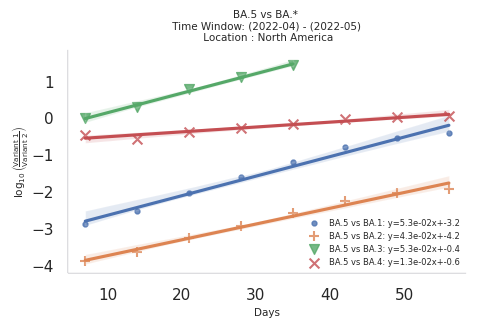

In [54]:
scatterplot_who1('North America', gra, start = '2022-04', end = '2022-05', lineages = ['BA.1','BA.2','BA.3','BA.4'])

In [36]:
# # !pip install line_profiler
# %load_ext line_profiler
# %lprun -f scatterplot_who1 scatterplot_who1('North America', gra, start = '2022-04', end = '2022-05', lineages = ['BA.1','BA.2','BA.3','BA.4'])

[('Europe', 'BA.5 vs BA.1', 0.045530207981966477, '2022-02-2022-05'), ('Europe', 'BA.5 vs BA.2', 0.0421856127399399, '2022-02-2022-05'), ('Europe', 'BA.5 vs BA.3', 0.047117283969713666, '2022-02-2022-05'), ('Europe', 'BA.5 vs BA.4', 0.0038692512281333882, '2022-02-2022-05')]
R-squared value for BA.5 vs BA.1: 0.9863632245826338
P-value value for BA.5 vs BA.1: 0.0000000001
R-squared value for BA.5 vs BA.2: 0.9882965666030903
P-value value for BA.5 vs BA.2: 0.0000000001
R-squared value for BA.5 vs BA.3: 0.990822682010643
P-value value for BA.5 vs BA.3: 0.0000000019
R-squared value for BA.5 vs BA.4: 0.5667575819670887
P-value value for BA.5 vs BA.4: 0.0047140545


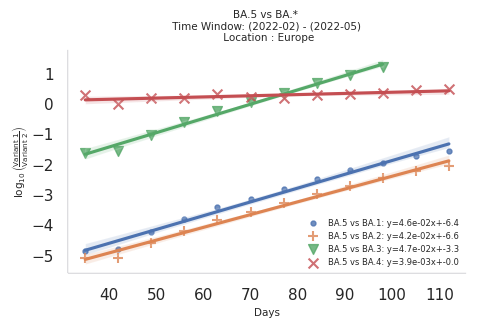

In [55]:
scatterplot_who1('Europe', gra, start = '2022-02', end = '2022-05', lineages = ['BA.1','BA.2','BA.3','BA.4'])

[('Asia', 'BA.5 vs BA.1', 0.05729890417307774, '2022-03-2022-05'), ('Asia', 'BA.5 vs BA.2', 0.046804945568471014, '2022-03-2022-05'), ('Asia', 'BA.5 vs BA.3', 0.05175466526290596, '2022-03-2022-05'), ('Asia', 'BA.5 vs BA.4', 0.005944561863730015, '2022-03-2022-05')]
R-squared value for BA.5 vs BA.1: 0.9737849817064617
P-value value for BA.5 vs BA.1: 0.0000056861
R-squared value for BA.5 vs BA.2: 0.9588131916148399
P-value value for BA.5 vs BA.2: 0.0000041944
R-squared value for BA.5 vs BA.3: 0.9681231950035596
P-value value for BA.5 vs BA.3: 0.0024389686
R-squared value for BA.5 vs BA.4: 0.19269712835845912
P-value value for BA.5 vs BA.4: 0.2765494733


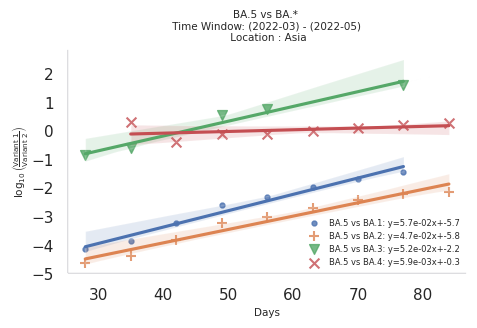

In [56]:
scatterplot_who1('Asia', gra, start = '2022-03', end = '2022-05', lineages = ['BA.1','BA.2','BA.3','BA.4'])

[('Africa', 'BA.5 vs BA.1', 0.03362299096370264, '2022-02-2022-04'), ('Africa', 'BA.5 vs BA.2', 0.027082309885273707, '2022-02-2022-04'), ('Africa', 'BA.5 vs BA.3', 0.0333846585791338, '2022-02-2022-04')]
R-squared value for BA.5 vs BA.1: 0.9883377779751519
P-value value for BA.5 vs BA.1: 0.0000000005
R-squared value for BA.5 vs BA.2: 0.9814693411218598
P-value value for BA.5 vs BA.2: 0.0000000042
R-squared value for BA.5 vs BA.3: 0.9925351673019589
P-value value for BA.5 vs BA.3: 0.0002743433


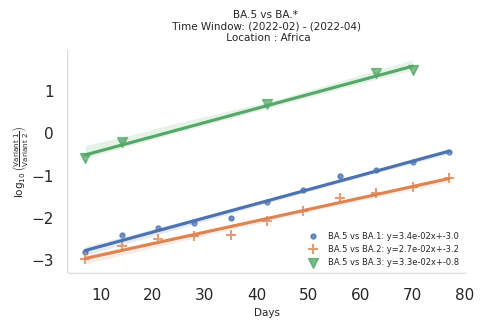

In [57]:
scatterplot_who1('Africa', gra, start = '2022-02', end = '2022-04', lineages = ['BA.1','BA.2','BA.3'])

[('Oceania', 'BA.5 vs BA.1', 0.04815709094738559, '2022-03-2022-05'), ('Oceania', 'BA.5 vs BA.2', 0.04315850432274398, '2022-03-2022-05')]
R-squared value for BA.5 vs BA.1: 0.9954259474832124
P-value value for BA.5 vs BA.1: 0.0000000300
R-squared value for BA.5 vs BA.2: 0.99566682876884
P-value value for BA.5 vs BA.2: 0.0000000255


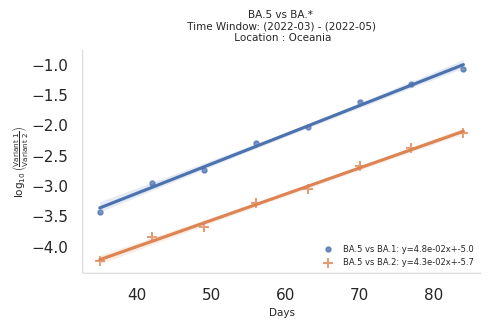

In [58]:
scatterplot_who1('Oceania', gra, start = '2022-03', end = '2022-05', lineages = ['BA.1','BA.2'])

# Regression plots `(Country level)` for `Omicron` sublienages `(BA.1-BA.5)`
*The country level regression plots are difficult to generate as most of the countries never faced the propagation all of the BA.1 to BA.5 sub variants*

In [74]:
# scatterplot_who1('USA', gra, start = '2022-04', end = '2022-05', lineages = ['BA.1','BA.2','BA.3','BA.4'])

In [73]:
# scatterplot_who1('Oceania', gra, start = '2022-01', end = '2022-03', lineages = ['BA.1', 'BA.2', 'BA.3', 'BA.4'])

In [61]:
# scatterplot_who1('United Kingdom', gra, start = '2022-01', end = '2022-05', lineages = ['BA.2'])

# `Bar Plot` of the slope values in diffeerent `Continents`

In [96]:
slope_values_of_continents = pd.read_csv('Omicron_sublineages_slope_values_continent.csv')
print(slope_values_of_continents)

         Location Sublineages_compared     Slope      Time_window
0   North America         BA.5 vs BA.1  0.053027  2022-04-2022-05
1   North America         BA.5 vs BA.2  0.042768  2022-04-2022-05
2   North America         BA.5 vs BA.3  0.052902  2022-04-2022-05
3   North America         BA.5 vs BA.4  0.013199  2022-04-2022-05
4          Europe         BA.5 vs BA.1  0.045530  2022-02-2022-05
5          Europe         BA.5 vs BA.2  0.042186  2022-02-2022-05
6          Europe         BA.5 vs BA.3  0.047117  2022-02-2022-05
7          Europe         BA.5 vs BA.4  0.003869  2022-02-2022-05
8            Asia         BA.5 vs BA.1  0.057299  2022-03-2022-05
9            Asia         BA.5 vs BA.2  0.046805  2022-03-2022-05
10           Asia         BA.5 vs BA.3  0.051755  2022-03-2022-05
11           Asia         BA.5 vs BA.4  0.005945  2022-03-2022-05
12         Africa         BA.5 vs BA.1  0.033623  2022-02-2022-04
13         Africa         BA.5 vs BA.2  0.027082  2022-02-2022-04
14        

In [97]:
slope_values_of_continents = slope_values_of_continents.drop_duplicates()
print(slope_values_of_continents)
print("\n")

         Location Sublineages_compared     Slope      Time_window
0   North America         BA.5 vs BA.1  0.053027  2022-04-2022-05
1   North America         BA.5 vs BA.2  0.042768  2022-04-2022-05
2   North America         BA.5 vs BA.3  0.052902  2022-04-2022-05
3   North America         BA.5 vs BA.4  0.013199  2022-04-2022-05
4          Europe         BA.5 vs BA.1  0.045530  2022-02-2022-05
5          Europe         BA.5 vs BA.2  0.042186  2022-02-2022-05
6          Europe         BA.5 vs BA.3  0.047117  2022-02-2022-05
7          Europe         BA.5 vs BA.4  0.003869  2022-02-2022-05
8            Asia         BA.5 vs BA.1  0.057299  2022-03-2022-05
9            Asia         BA.5 vs BA.2  0.046805  2022-03-2022-05
10           Asia         BA.5 vs BA.3  0.051755  2022-03-2022-05
11           Asia         BA.5 vs BA.4  0.005945  2022-03-2022-05
12         Africa         BA.5 vs BA.1  0.033623  2022-02-2022-04
13         Africa         BA.5 vs BA.2  0.027082  2022-02-2022-04
14        

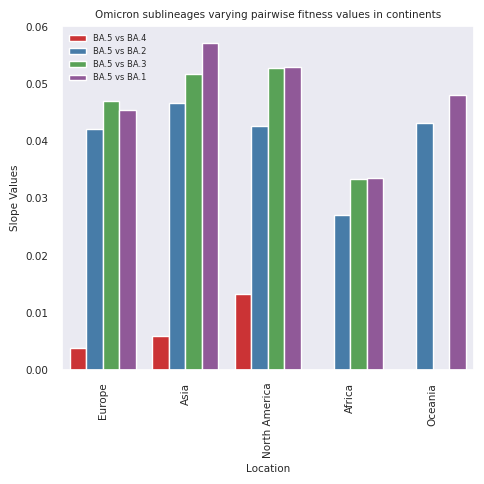

In [98]:
# Sort the DataFrame by 'Slope' column in ascending order
slope_values_of_continents = slope_values_of_continents.sort_values('Slope', ascending=True)

# Define the color palette
color_palette = sns.color_palette('Set1', len(slope_values_of_continents))

# Plot the bar plot with the specified color palette
plt.figure(figsize=(5, 5))
sns.barplot(x='Location', y='Slope', hue = 'Sublineages_compared', data=slope_values_of_continents, palette=color_palette)
plt.legend(loc='upper left', prop={'size': 6}, facecolor='white', frameon=False)
plt.xlabel('Location', fontsize = 7.5)
plt.ylabel('Slope Values', fontsize = 7.5)
plt.title('Omicron sublineages varying pairwise fitness values in continents', fontsize = 7.5)
plt.xticks(rotation=90)
plt.grid(False)  # Turn off the grid lines
plt.tight_layout()

# Specify the directory path
directory = "/scr/mjpantho/Pantho_differential_fitness/omicron_sublineages_regression_plots/"

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the figure to the specified directory with DPI set to 300
filename = os.path.join(directory, "omicron_sublineages_bar_plot.png")
plt.savefig(filename, dpi=300, bbox_inches="tight")

# Display the figure
plt.show()